In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuração de estilo para os gráficos
sns.set(style="whitegrid")

#processamento do arquivo
#o arquivo tem linhas com @ATTRIBUTE que definem as colunas e @DATA onde iniciam os dados.
filename = "FootballPlayersDataset.csv.csv"
col_names = []
data_start_line = 0

with open(filename, "r", encoding='utf-8', errors='replace') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if line.startswith("@ATTRIBUTE"):
            #pega o segundo elemento da linha
            parts = line.split()
            if len(parts) >= 2:
                col_names.append(parts[1])
        elif line.startswith("@DATA"):
            data_start_line = i + 1
            break

print(f"Colunas encontradas: {len(col_names)}")
print(f"Dados começam na linha: {data_start_line}")

#carregar o CSV pulando os metadados
df = pd.read_csv(filename, skiprows=data_start_line, names=col_names, header=None)

print("Dataset carregado com sucesso!")
display(df.head())
print(f"Dimensões do dataset: {df.shape}")

Colunas encontradas: 53
Dados começam na linha: 63
Dataset carregado com sucesso!


,Unnamed:_0,ID,Name,Age,Nationality,Club,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,...,Minutes_Played,Goals,Assists,ShotsOnGoal,Shots,Yellow_Card,Red_Card,Potential,Overall,Value
0,0,768,Felipe,33,Brazil,SPAL,Left,2,3,2,...,1688,3,2,9,14,13,0,75,75,2.7M
1,1,9014,Arjen Robben',34,Netherlands,FC Bayern Mnchen',Left,4,2,4,...,111,4,0,11,23,0,0,84,84,15.5M
2,2,20801,Cristiano Ronaldo',33,Portugal,Juventus,Right,5,4,5,...,1879,21,7,65,172,3,0,94,94,77M
3,3,25420,Claudio Pizarro',39,Peru,SV Werder Bremen',Right,3,4,4,...,483,5,2,9,26,1,0,74,74,1.6M
4,4,45186,Joaquin,36,Spain,Real Betis',Right,2,3,4,...,1383,6,0,12,22,5,0,81,81,6M


Dimensões do dataset: (491, 53)


In [12]:
#função para limpar a coluna de valor
def clean_currency(x):
    if isinstance(x, str):
        x = x.replace('€', '')
        if 'M' in x:
            return float(x.replace('M', '')) * 1000000
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
    return float(x) if x else 0

#função para limpar peso
def clean_weight(x):
    if isinstance(x, str):
        return float(x.replace('lbs', ''))
    return float(x)

#aplicando as limpezas
df['Value_Num'] = df['Value'].apply(clean_currency)
df['Weight_Num'] = df['Weight'].apply(clean_weight)
df['Minutes_Played'] = pd.to_numeric(df['Minutes_Played'], errors='coerce')

print("Colunas 'Value', 'Weight' e 'Minutes_Played' convertidas para numérico.")
df[['Value', 'Value_Num', 'Weight', 'Weight_Num', 'Minutes_Played']].head()

Colunas 'Value', 'Weight' e 'Minutes_Played' convertidas para numérico.


,Value,Value_Num,Weight,Weight_Num,Minutes_Played
0,2.7M,2700000.0,165lbs,165.0,1688.0
1,15.5M,15500000.0,176lbs,176.0,111.0
2,77M,77000000.0,183lbs,183.0,1879.0
3,1.6M,1600000.0,185lbs,185.0,483.0
4,6M,6000000.0,165lbs,165.0,1383.0


In [13]:
#tipos e missing values
print("--- Informações dos Tipos de Dados ---")
print(df.info())

print("\n--- Valores Ausentes (Missing Values) ---")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n--- Estatísticas Descritivas (Colunas Numéricas) ---")
display(df.describe())

--- Informações dos Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed:_0                491 non-null    int64  
 1   ID                        491 non-null    int64  
 2   Name                      491 non-null    object 
 3   Age                       491 non-null    int64  
 4   Nationality               491 non-null    object 
 5   Club                      491 non-null    object 
 6   Preferred_Foot            491 non-null    object 
 7   International_Reputation  491 non-null    int64  
 8   Weak_Foot                 491 non-null    int64  
 9   Skill_Moves               491 non-null    int64  
 10  Height                    491 non-null    object 
 11  Weight                    491 non-null    object 
 12  Crossing                  491 non-null    int64  
 13  Finishing                 

,Unnamed:_0,ID,Age,International_Reputation,Weak_Foot,Skill_Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Goals,Assists,ShotsOnGoal,Shots,Yellow_Card,Red_Card,Potential,Overall,Value_Num,Weight_Num
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,4.910000e+02,491.000000
mean,245.000000,202280.427699,25.733198,1.845214,3.362525,3.344196,66.130346,71.028513,65.012220,74.352342,...,7.171079,3.283096,20.240326,50.409369,3.796334,0.079430,81.14053,77.867617,1.722862e+07,168.183299
std,141.883755,28961.163009,3.856627,0.919446,0.722058,0.692277,13.321431,12.195148,13.282636,7.383109,...,4.780408,2.875530,12.350299,28.206915,2.772913,0.278121,5.06152,5.271486,1.778214e+07,14.739057
min,0.000000,768.000000,17.000000,1.000000,1.000000,2.000000,14.000000,19.000000,22.000000,45.000000,...,3.000000,0.000000,3.000000,7.000000,0.000000,0.000000,67.00000,61.000000,3.250000e+05,130.000000
25%,122.500000,190483.500000,23.000000,1.000000,3.000000,3.000000,59.500000,67.000000,56.000000,69.000000,...,4.000000,1.000000,11.000000,29.000000,2.000000,0.000000,77.00000,75.000000,6.500000e+06,159.000000
50%,245.000000,204923.000000,25.000000,2.000000,3.000000,3.000000,68.000000,73.000000,67.000000,75.000000,...,6.000000,3.000000,18.000000,46.000000,3.000000,0.000000,81.00000,77.000000,1.100000e+07,168.000000
75%,367.500000,220144.500000,28.000000,2.000000,4.000000,4.000000,76.000000,78.000000,75.000000,79.000000,...,9.000000,5.000000,26.000000,64.500000,5.000000,0.000000,85.00000,81.000000,2.100000e+07,179.000000
max,490.000000,246242.000000,39.000000,5.000000,5.000000,5.000000,91.000000,95.000000,93.000000,93.000000,...,36.000000,15.000000,89.000000,172.000000,15.000000,2.000000,95.00000,94.000000,1.185000e+08,216.000000


/tmp/ipython-input-76273687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nacionalidades.values, y=top_nacionalidades.index, palette="viridis")


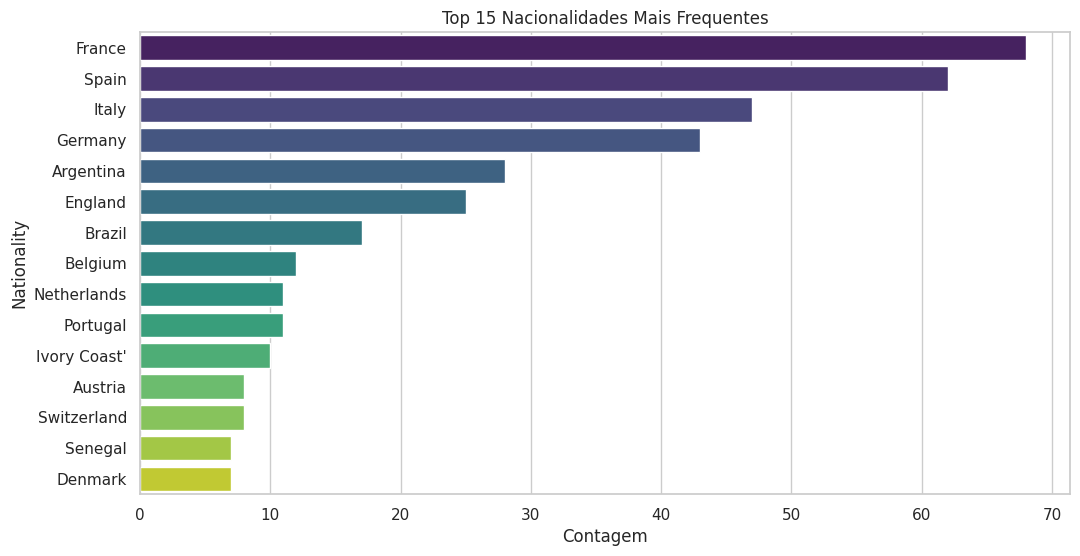


Distribuição Percentual (Top 10):
Nationality
France         13.849287
Spain          12.627291
Italy           9.572301
Germany         8.757637
Argentina       5.702648
England         5.091650
Brazil          3.462322
Belgium         2.443992
Netherlands     2.240326
Portugal        2.240326
Name: proportion, dtype: float64


In [14]:
#variáveis categoricas
#analisar a Nacionalidade (coloquei top 15 pra não poluir o gráfico)
top_nacionalidades = df['Nationality'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_nacionalidades.values, y=top_nacionalidades.index, palette="viridis")
plt.title('Top 15 Nacionalidades Mais Frequentes')
plt.xlabel('Contagem')
plt.show()

#distribuição percentual
print("\nDistribuição Percentual (Top 10):")
print(df['Nationality'].value_counts(normalize=True).head(10) * 100)

Observei uma grande diversidade de nacionalidades, mas há uma predominância clara de países com ligas fortes (Espanha, França, Alemanha). A categoria é muito fragmentada (muitas categorias com pouca frequência), o que pode dificultar o modelo se usar "One-Hot Encoding" sem agrupar as nações menores em "Outros".

Distribuição da classe 'Preferred_Foot':
Preferred_Foot
Right    381
Left     110
Name: count, dtype: int64

Percentual:
Preferred_Foot
Right    77.596741
Left     22.403259
Name: proportion, dtype: float64


/tmp/ipython-input-3777642125.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, ax=ax[0], palette='pastel')


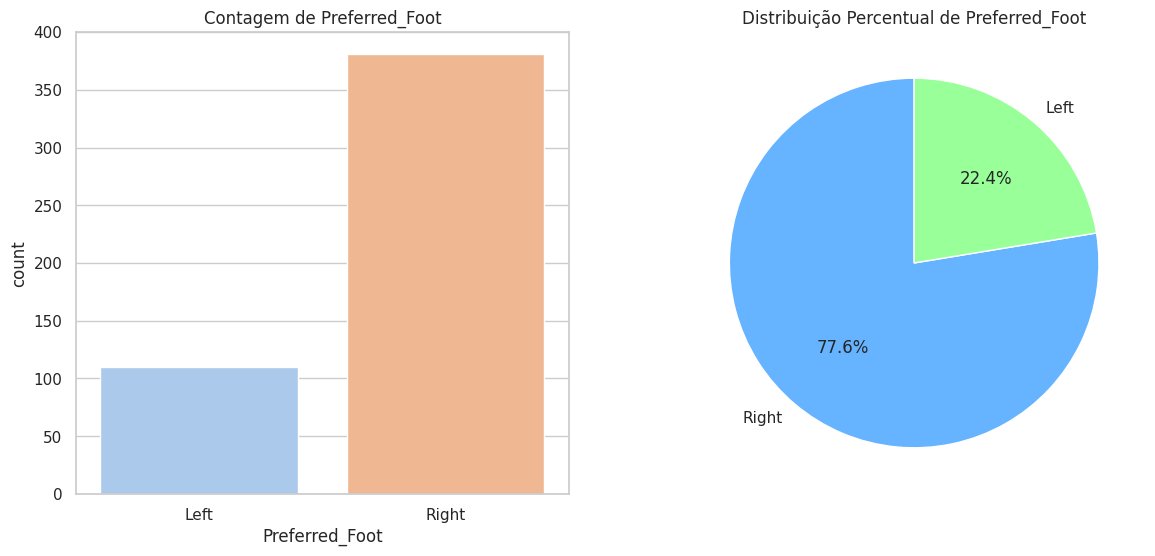


Tabela Cruzada (Nível Geral vs Pé Preferido):


Preferred_Foot,Left,Right
Overall_Level,,
Baixo,37,119
Médio,14,83
Alto,31,96
Elite,28,83


In [15]:
#análise do Target (Preferred_Foot)
target_col = 'Preferred_Foot'

#distribuição absoluta e percentual
print(f"Distribuição da classe '{target_col}':")
print(df[target_col].value_counts())
print("\nPercentual:")
print(df[target_col].value_counts(normalize=True) * 100)

#gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#gráfico de barras
sns.countplot(x=target_col, data=df, ax=ax[0], palette='pastel')
ax[0].set_title(f'Contagem de {target_col}')

#gráfico de pizza
df[target_col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], startangle=90, colors=['#66b3ff','#99ff99'])
ax[1].set_ylabel('')
ax[1].set_title(f'Distribuição Percentual de {target_col}')

plt.show()

#tabela cruzada
#criar uma categoria simples de overall para cruzar
df['Overall_Level'] = pd.qcut(df['Overall'], q=4, labels=["Baixo", "Médio", "Alto", "Elite"])
crosstab = pd.crosstab(df['Overall_Level'], df[target_col])
print("\nTabela Cruzada (Nível Geral vs Pé Preferido):")
display(crosstab)

A classe está desbalanceada. Aprox. 77% dos jogadores são destros e apenas 22% são canhotos. Isso é importante porque o modelo pode ficar enviesado a prever sempre "Right" se não tratar esse desbalanceamento (usando métricas como F1-Score em vez de Acurácia simples).

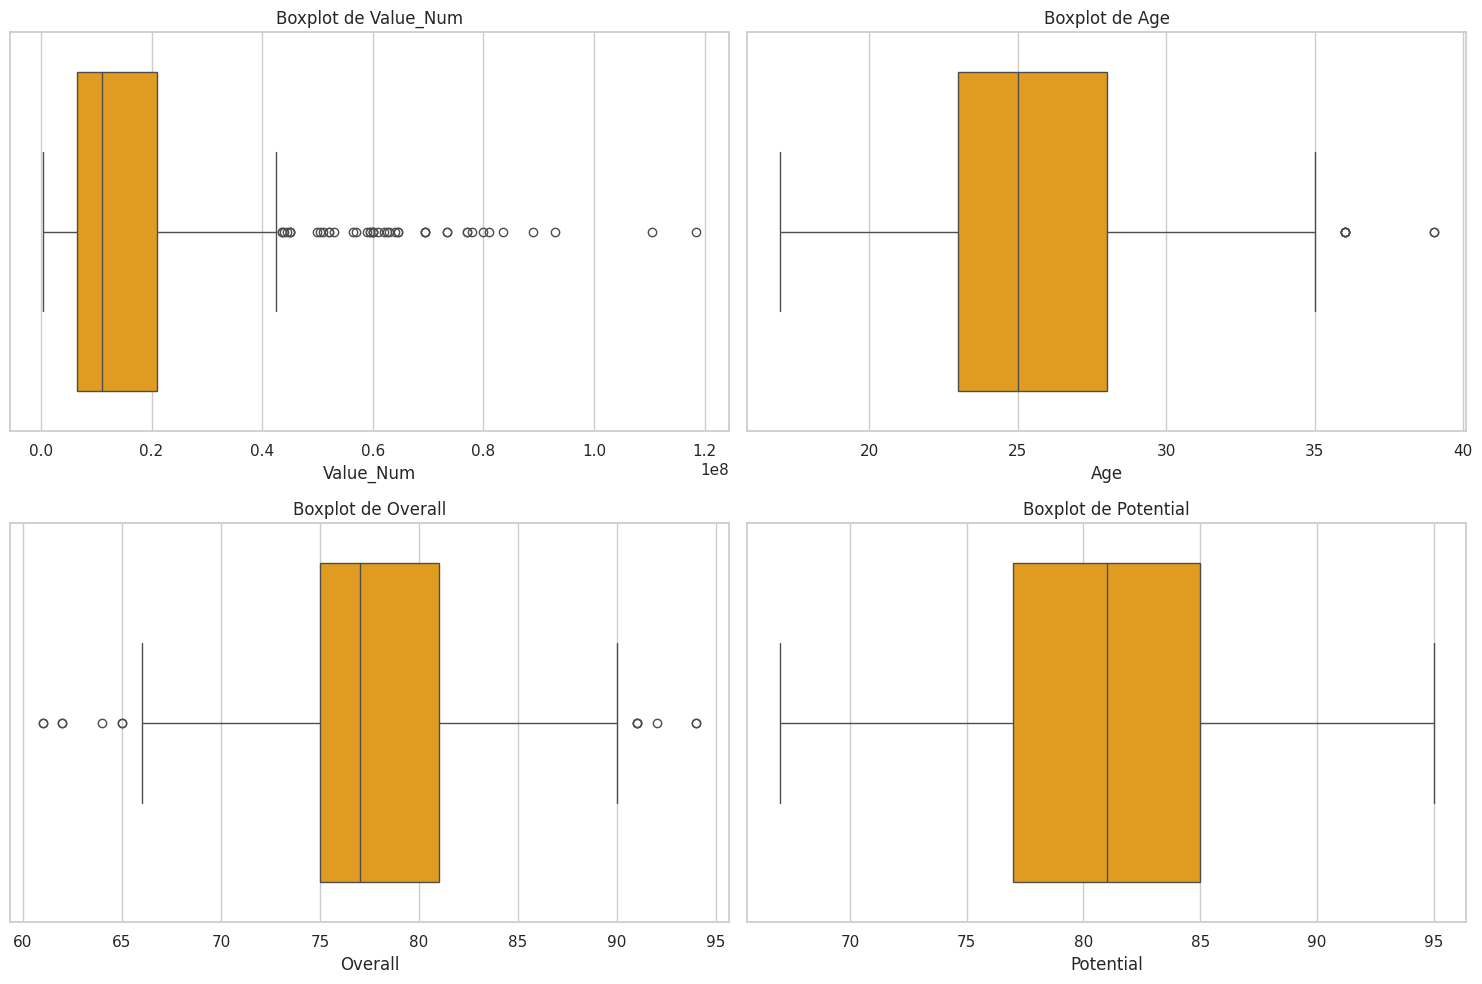

In [16]:
#outliers
features_outliers = ['Value_Num', 'Age', 'Overall', 'Potential']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

A coluna Value_Num (Valor de Mercado) apresenta uma quantidade extrema de outliers superiores. Isso faz sentido no futebol, onde uma minoria de "superestrelas" (como CR7, Messi, Neymar) vale exponencialmente mais que a média dos jogadores. Esses outliers podem distorcer modelos lineares e precisam ser tratados.

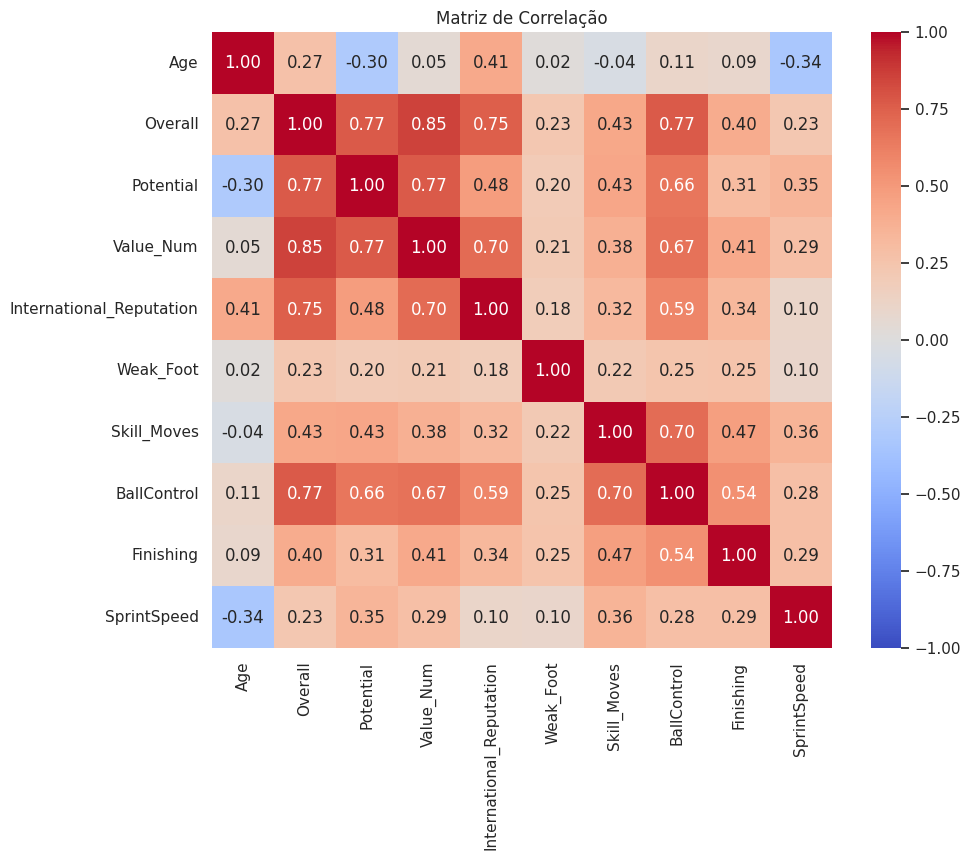

In [17]:
#correlação
#selecionando colunas numéricas relevantes para correlação
corr_cols = ['Age', 'Overall', 'Potential', 'Value_Num', 'International_Reputation',
             'Weak_Foot', 'Skill_Moves', 'BallControl', 'Finishing', 'SprintSpeed']

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

O mapa de calor mostra fortes correlações positivas. Por exemplo, Overall (Habilidade Geral) tem forte correlação com Reactions e Composure. O Value_Num também cresce junto com o Overall. Isso indica redundância. Talvez não precise de todas as colunas para o modelo, pois elas explicam a mesma coisa.

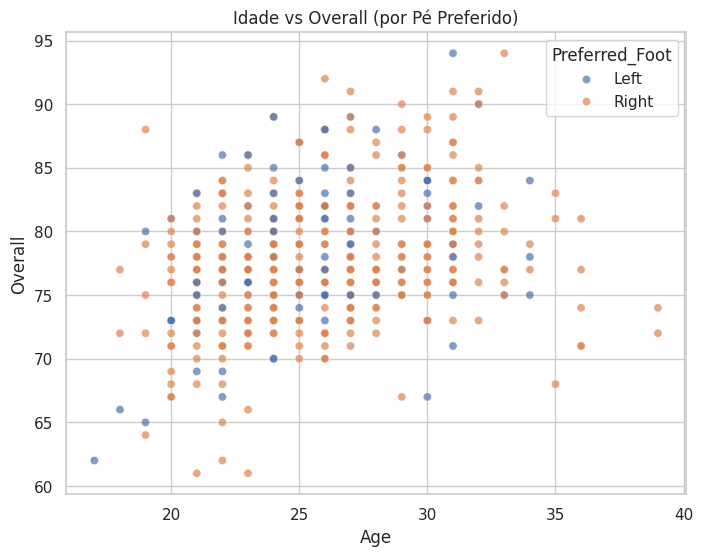

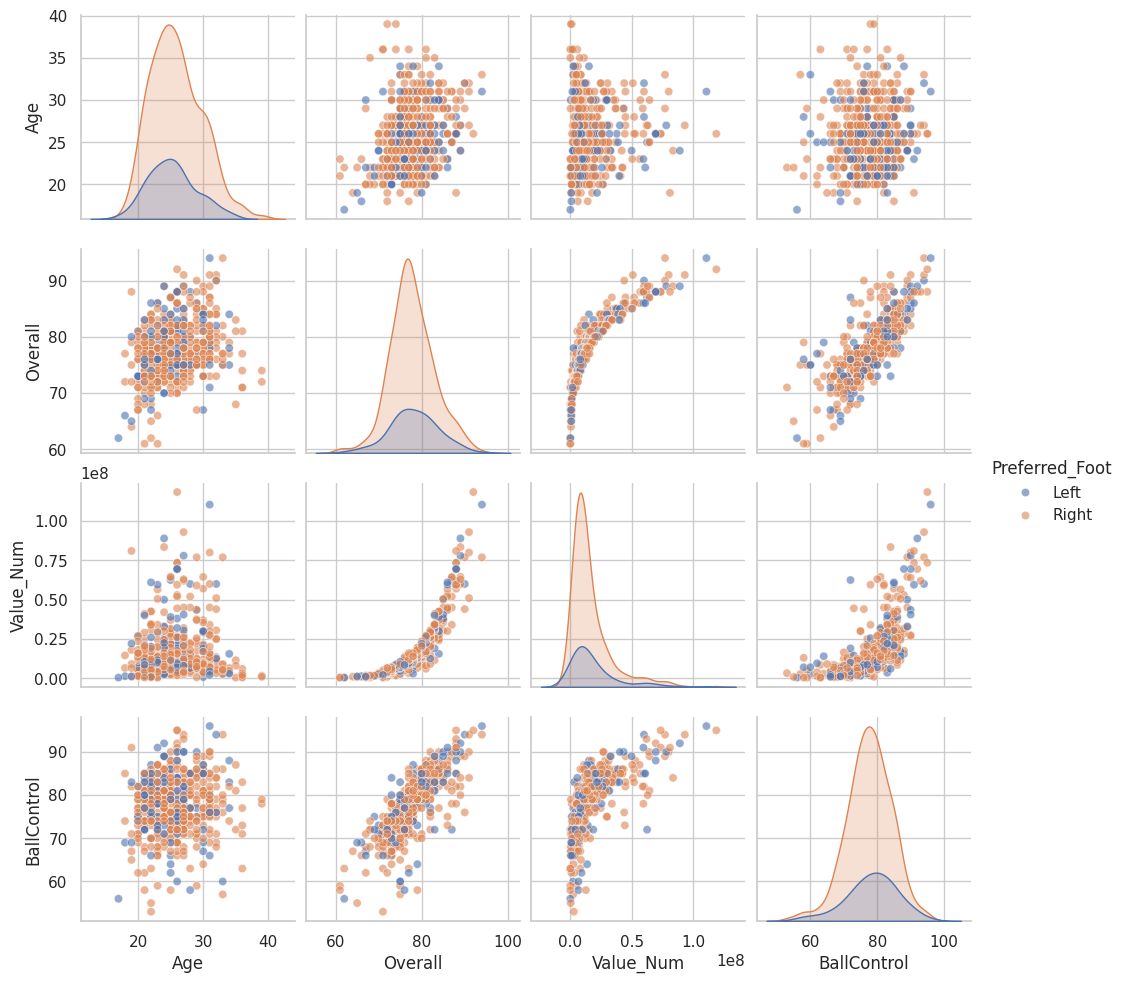

In [18]:
#scatterplots e pairplots
#scatterplot: idade vs overall colorido pelo pé preferido
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Overall', hue='Preferred_Foot', alpha=0.7)
plt.title('Idade vs Overall (por Pé Preferido)')
plt.show()

#pairplot (amostragem das 4 primeiras vars numéricas relevantes)
vars_pairplot = ['Age', 'Overall', 'Value_Num', 'BallControl']
sns.pairplot(df, vars=vars_pairplot, hue='Preferred_Foot', plot_kws={'alpha': 0.6})
plt.show()

Scatterplot (age vs overall): o gráfico mostra que a maioria dos jogadores atinge o pico de overall (habilidade geral) entre os 25 e 30 anos. Não há uma distinção clara de performance baseada apenas no pé preferido (as cores estão misturadas), o que indica que ser canhoto ou destro não determina o nível de habilidade.

Pairplot: As distribuições mostram que atributos como Value_Num estão fortemente concentrados em valores baixos, com poucos jogadores valendo muito (distribuição assimétrica). A relação entre overall e value_num é exponencial: pequenos aumentos no overall geram grandes aumentos no valor de mercado.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


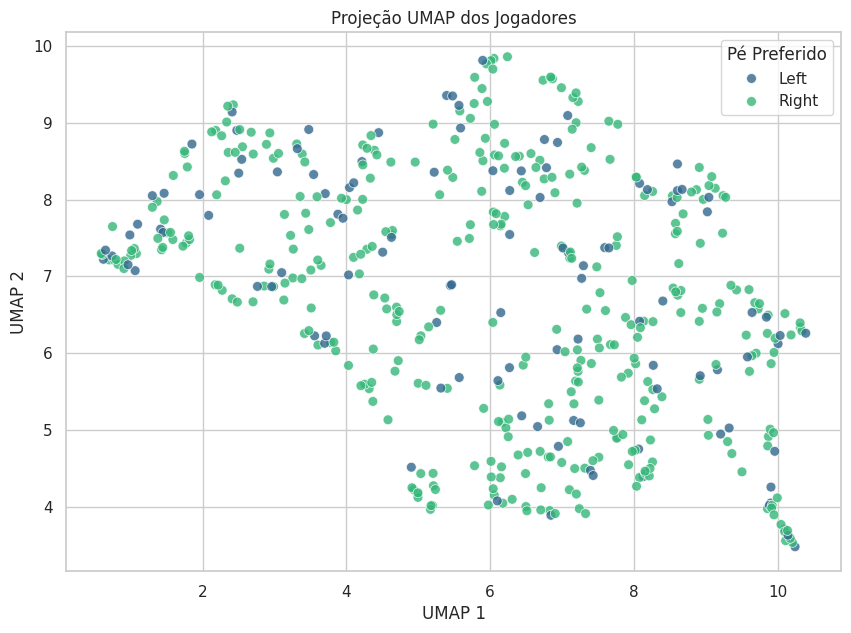

In [19]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

#preparação dos dados
features_umap = ['Age', 'Overall', 'Potential', 'Value_Num', 'BallControl', 'Finishing', 'SprintSpeed']
X = df[features_umap].dropna() #remove linhas com NaNs nestas colunas
y = df.loc[X.index, 'Preferred_Foot']

#normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#aplicação do UMAP
#definindo random_state para reprodutibilidade
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

#plotagem
plt.figure(figsize=(10, 7))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y, palette='viridis', s=50, alpha=0.8)
plt.title('Projeção UMAP dos Jogadores')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Pé Preferido')
plt.show()

A projeção UMAP conseguiu separar visualmente os jogadores em grupos baseados em suas estatísticas. Embora a cor (target) seja o pé preferido e não haja uma separação nítida de esquerda/direita (o que é esperado, pois habilidade não depende do pé), a estrutura dos clusters sugere que o UMAP agrupou jogadores por nível de habilidade ou posição em campo.